# Laptop Price Prediction Using Linear Regression

## Dataset link : https://www.kaggle.com/datasets/ali91saif/laptop-price-estimationused

In [1]:
import pandas as pd

## Reading Dataset

In [2]:
df=pd.read_csv("Laptop_Price_Dataset.csv",encoding = "ISO-8859-1")

In [3]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,1599.00
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,799.00
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,638.80
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.6kg,1599.00


In [4]:
df.shape

(1099, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1099 non-null   int64  
 1   Company           1099 non-null   object 
 2   Product           1099 non-null   object 
 3   TypeName          1099 non-null   object 
 4   Inches            1099 non-null   float64
 5   ScreenResolution  1099 non-null   object 
 6   Cpu               1099 non-null   object 
 7   Ram               1099 non-null   object 
 8   Memory            1099 non-null   object 
 9   Gpu               1099 non-null   object 
 10  OpSys             1099 non-null   object 
 11  Weight            1099 non-null   object 
 12  Price_euros       1099 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 111.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
# Price Euros to Rupees
# 1 Euro = 91.21 rupees
df['Price']=df['Price_euros'].apply(lambda x:x*91.21)
df['Price']

0       122193.1249
1        81992.3174
2        52445.7500
3       231440.8145
4       164506.3560
           ...     
1094    145844.7900
1095     72876.7900
1096     58264.9480
1097    145844.7900
1098     45605.0000
Name: Price, Length: 1099, dtype: float64

In [9]:
df.drop(columns=['Price_euros'],inplace=True)

In [10]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,122193.1249
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,81992.3174
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,52445.7500
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,231440.8145
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,164506.3560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,145844.7900
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,72876.7900
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,58264.9480
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.6kg,145844.7900


In [11]:
# 2^8=256
df['RAM']=df['Ram'].str.replace('GB','').astype('int8')
df['Weight']=df['Weight'].str.replace('kg','').astype('float32')

In [12]:
df.drop(columns=['RAM'],inplace=True)

In [13]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122193.1249
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,81992.3174
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,52445.7500
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231440.8145
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164506.3560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,145844.7900
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,72876.7900
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,58264.9480
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,145844.7900


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1099 non-null   int64  
 1   Company           1099 non-null   object 
 2   Product           1099 non-null   object 
 3   TypeName          1099 non-null   object 
 4   Inches            1099 non-null   float64
 5   ScreenResolution  1099 non-null   object 
 6   Cpu               1099 non-null   object 
 7   Ram               1099 non-null   object 
 8   Memory            1099 non-null   object 
 9   Gpu               1099 non-null   object 
 10  OpSys             1099 non-null   object 
 11  Weight            1099 non-null   float32
 12  Price             1099 non-null   float64
dtypes: float32(1), float64(2), int64(1), object(9)
memory usage: 107.5+ KB


In [15]:
# EDA 
# Univarient 
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\aumka\AppData\Local\Temp\ipykernel_8100\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

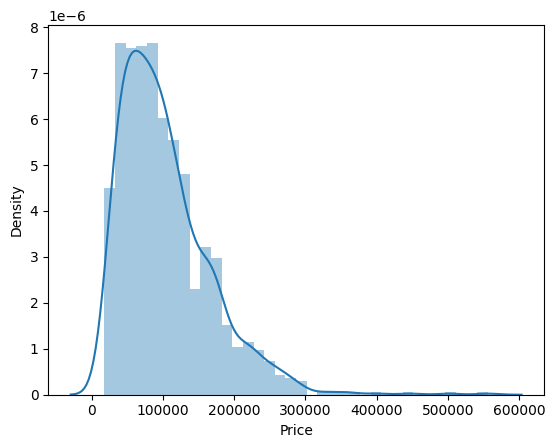

In [16]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

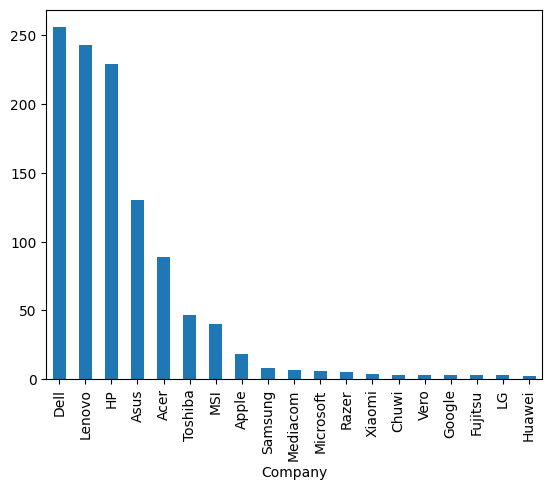

In [17]:
df['Company'].value_counts().plot(kind='bar')

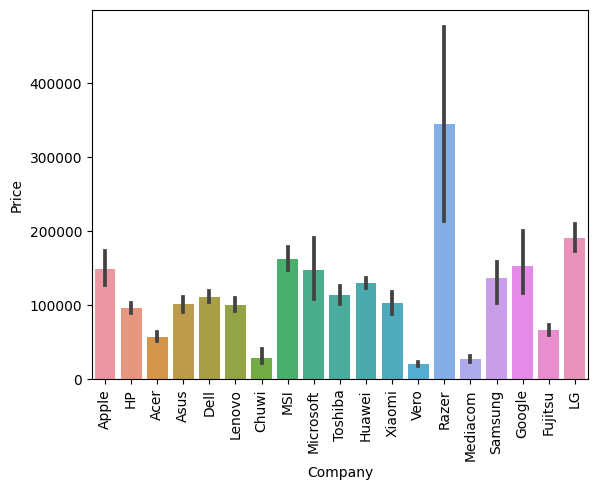

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

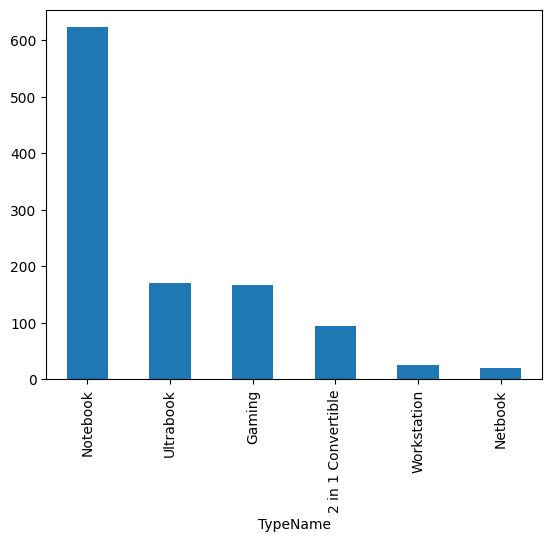

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

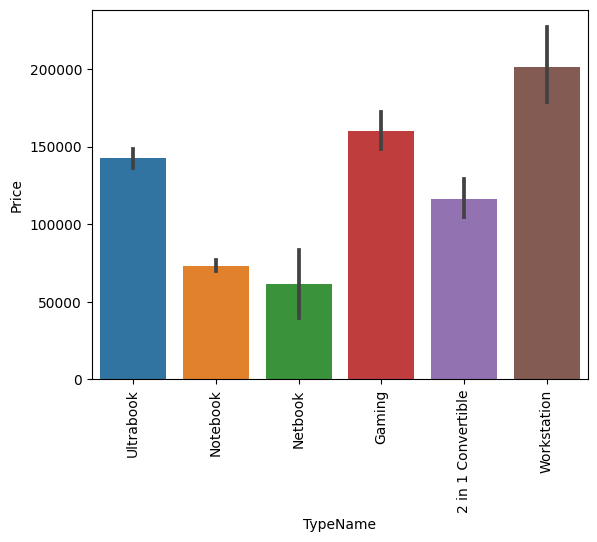

In [20]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\aumka\AppData\Local\Temp\ipykernel_8100\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

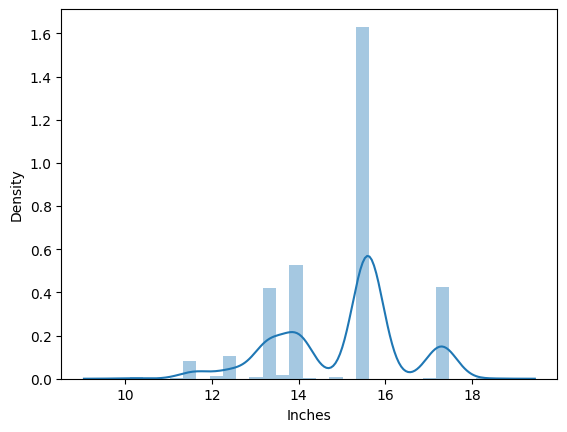

In [21]:
sns.distplot(df['Inches'])

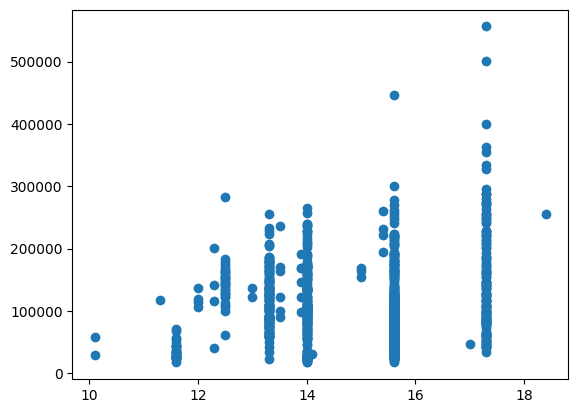

In [22]:
plt.scatter(x=df['Inches'],y=df['Price'])

In [23]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                447
1366x768                                         214
IPS Panel Full HD 1920x1080                      197
IPS Panel Full HD / Touchscreen 1920x1080         42
Full HD / Touchscreen 1920x1080                   40
1600x900                                          20
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Quad HD+ / Touchscreen 3200x1800                  10
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
1440x900                                           4
IPS Panel Retina Display 2304x1440                 4
IPS Panel Retina Display 2880

## Feature Engineering

In [24]:
df['isTouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'touchscreen' in x.lower() else 0)

In [25]:
df.loc[df['isTouchScreen']==1]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,isTouchScreen
19,20,Dell,XPS 13,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,89294.5900,1
23,24,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,74700.9900,1
33,34,Dell,XPS 13,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.20,170471.4900,1
44,45,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,91118.7900,1
50,51,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,29095.9900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,1072,Dell,Inspiron 7378,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,118481.7900,1
1067,1082,Dell,Inspiron 5368,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.62,72786.4921,1
1074,1089,Lenovo,ThinkPad Yoga,Ultrabook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.30,156287.4229,1
1080,1095,Lenovo,Yoga 900S-12ISK,Ultrabook,12.5,IPS Panel Touchscreen 2560x1440,Intel Core M 6Y75 1.2GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,0.99,127602.7900,1


<Axes: xlabel='isTouchScreen'>

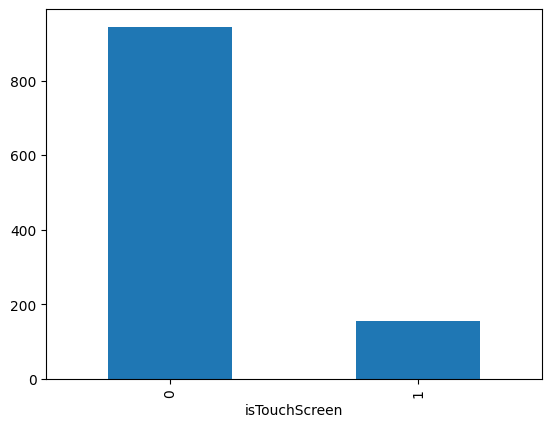

In [26]:
df['isTouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='isTouchScreen', ylabel='Price'>

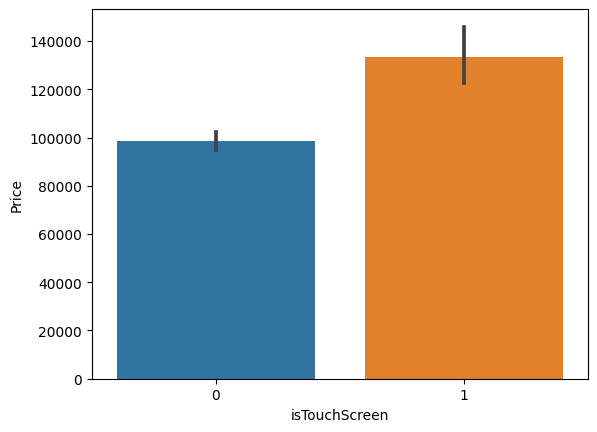

In [27]:
sns.barplot(x=df['isTouchScreen'],y=df['Price'])

In [28]:
df['isIPS']=df['ScreenResolution'].apply(lambda x: 1 if 'ips' in x.lower() else 0)

<Axes: xlabel='isIPS'>

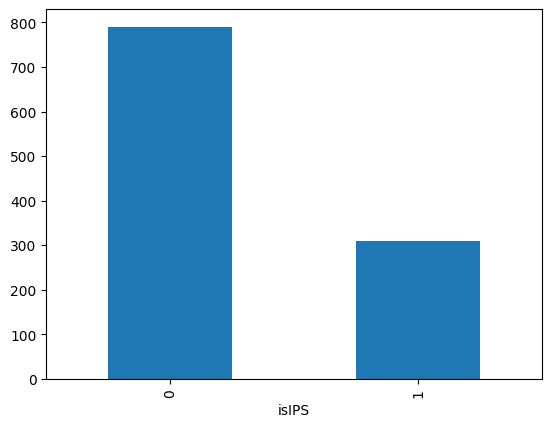

In [29]:
df['isIPS'].value_counts().plot(kind='bar')

In [30]:
temp=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
df['X_res']=temp[0]
df['Y_res']=temp[1]

In [32]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,isTouchScreen,isIPS,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122193.1249,0,1,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,81992.3174,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,52445.7500,0,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231440.8145,0,1,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164506.3560,0,1,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,145844.7900,0,0,1366,768
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,72876.7900,0,0,Full HD 1920,1080
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,58264.9480,0,0,Full HD 1920,1080
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,145844.7900,0,0,Full HD 1920,1080


In [33]:
df['X_res'].value_counts()

X_res
Full HD 1920                                447
1366                                        214
IPS Panel Full HD 1920                      198
IPS Panel Full HD / Touchscreen 1920         42
Full HD / Touchscreen 1920                   40
1600                                         20
Touchscreen 1366                             15
IPS Panel 4K Ultra HD 3840                   12
IPS Panel 4K Ultra HD / Touchscreen 3840     11
4K Ultra HD / Touchscreen 3840               10
Quad HD+ / Touchscreen 3200                  10
IPS Panel 1366                                7
4K Ultra HD 3840                              6
IPS Panel Retina Display 2560                 6
Touchscreen 2256                              6
Touchscreen 2560                              5
1440                                          4
IPS Panel Retina Display 2304                 4
IPS Panel Retina Display 2880                 4
IPS Panel 2560                                4
Touchscreen 2400                  

In [34]:
df['X_res']=df['X_res'].str.findall(r'\d+').apply(lambda x:x[0])

In [35]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,isTouchScreen,isIPS,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122193.1249,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,81992.3174,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,52445.7500,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231440.8145,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164506.3560,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,145844.7900,0,0,1366,768
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,72876.7900,0,0,1920,1080
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,58264.9480,0,0,1920,1080
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,145844.7900,0,0,1920,1080


In [38]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1099 non-null   int64  
 1   Company           1099 non-null   object 
 2   Product           1099 non-null   object 
 3   TypeName          1099 non-null   object 
 4   Inches            1099 non-null   float64
 5   ScreenResolution  1099 non-null   object 
 6   Cpu               1099 non-null   object 
 7   Ram               1099 non-null   object 
 8   Memory            1099 non-null   object 
 9   Gpu               1099 non-null   object 
 10  OpSys             1099 non-null   object 
 11  Weight            1099 non-null   float32
 12  Price             1099 non-null   float64
 13  isTouchScreen     1099 non-null   int64  
 14  isIPS             1099 non-null   int64  
 15  X_res             1099 non-null   int32  
 16  Y_res             1099 non-null   int32  


In [42]:
df.drop(columns=['ScreenResolution'],inplace=True)

### Finding Correlations

In [51]:
df.corr()

ValueError: could not convert string to float: 'Apple'